# <u><centere>Spotify Track Analysis (2023 Portfolio Project)</centere></u>
## Ben Johanski
<hr>

# <u>Summary</u>
 - Dataset Source: https://www.kaggle.com/datasets/josephinelsy/spotify-top-hit-playlist-2010-2022
 
## Sections
 - Data Loading and Libraries
 - Summary Statistics
 - Data Cleaning and Tidying
 - Basic Visualizations
 - EDA
## Project Goals
 - The purpose of the following analysis is to identify trends and connections between popular tracks identified on the spotify top hit playlist. Although this includes tracks back to 2010, data is also included for tracks dating back to 2000. As a musician, I'm excited to see if there are any trends through time and between variables. Maybe this will give me some insight into characteristics which I should include in my next track! Some of the topics which I intend to explore are as follows:
     - If I were to want to publish a track with the intent of it gaining popularity, I would like to know if there are any audio features (danceability, key, energy, etc.) that appear in more popular tracks.
         - Additionally, what album characteristics seem to do the best?
     - Are there any trends through time as it pertains to top tracks and audio features? Track length?
     - Trends in artist popularity

### Data Loading and Libraries

In [19]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [20]:
#Importing Spotify data
spotify_data = pd.read_csv('playlist_2010to2022.csv')

### Summary Statistics

In [21]:
#Creating a list of columns for ease of access.
spotify_columns = list(spotify_data.columns)
print(spotify_columns)

#Checking layout of data
spotify_data.head(10)

['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity', 'album', 'artist_id', 'artist_name', 'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
5,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,5Mmk2ii6laakqfeCT7OnVD,Thong Song,73,Unleash The Dragon,6x9QLdzo6eBZxJ1bHsDkjg,Sisqo,"['contemporary r&b', 'dirty south rap', 'hip p...",56,...,-6.959,1.0,0.0654,0.11900,0.000096,0.0700,0.714,121.549,253733.0,4.0
6,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3yfqSUWxFvZELEM4PmlwIR,The Real Slim Shady,88,The Marshall Mathers LP,7dGJo4pcD2V6oG8kP0tJRR,Eminem,"['detroit hip hop', 'hip hop', 'rap']",88,...,-4.244,0.0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,284200.0,4.0
7,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7oQSevUCbYs4QawXTHQVV1,Rock DJ,57,Sing When You're Winning,2HcwFjNelS49kFbfvMxQYw,Robbie Williams,"['dance rock', 'europop']",69,...,-4.307,1.0,0.0326,0.02600,0.000000,0.0981,0.842,103.032,260560.0,4.0
8,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,7H6ev70Weq6DdpZyyTmUXk,Say My Name,80,The Writing's On The Wall,1Y8cdNmUJH7yBTd9yOvr5i,Destiny's Child,"['dance pop', 'girl group', 'pop', 'r&b', 'urb...",69,...,-3.525,0.0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,271333.0,4.0
9,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,64BbK9SFKH2jk86U3dGj2P,Otherside,83,Californication (Deluxe Edition),0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,"['alternative rock', 'funk metal', 'funk rock'...",80,...,-3.265,1.0,0.0574,0.00316,0.000202,0.0756,0.513,123.229,255373.0,4.0


In [6]:
#Checking value data types
spotify_data.dtypes

playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

In [4]:
#Summary statistics
spotify_data.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


### Duplicate and Null Value Checks

In [5]:
#Checking to see if any duplicates are found after initial review. Using a formula to quickly run through each column
# Overall check
dupe_manual = 0
dupe_df = spotify_data.duplicated()
for i in range(len(dupe_df)):
    if dupe_df[i] == True:
        dupe_manual += 1
print(dupe_manual)

#Column check
for i in range(len(spotify_columns)):
    col_name = spotify_columns[i]
    current_col = spotify_data[col_name]
    dupe_count = 0
    for i in current_col:
        if i == True:
            dupe_count += 1
    print("Potential Dupes for {}: ".format(col_name) + str(dupe_count))

0
Potential Dupes for playlist_url: 0
Potential Dupes for year: 0
Potential Dupes for track_id: 0
Potential Dupes for track_name: 0
Potential Dupes for track_popularity: 3
Potential Dupes for album: 0
Potential Dupes for artist_id: 0
Potential Dupes for artist_name: 0
Potential Dupes for artist_genres: 0
Potential Dupes for artist_popularity: 0
Potential Dupes for danceability: 0
Potential Dupes for energy: 0
Potential Dupes for key: 297
Potential Dupes for loudness: 0
Potential Dupes for mode: 1376
Potential Dupes for speechiness: 0
Potential Dupes for acousticness: 0
Potential Dupes for instrumentalness: 0
Potential Dupes for liveness: 0
Potential Dupes for valence: 0
Potential Dupes for tempo: 0
Potential Dupes for duration_ms: 0
Potential Dupes for time_signature: 4


### Data Cleaning and Tidying
 - Checked for dupes? _X_
 - Checked for null values? _X_
 - Removed unnessecary columns? ___
 - Remove outliers? ___

In [6]:
# Checking for null values
total_null_count = spotify_data.isnull().sum().sum()
print('Total number of null values:', total_null_count)

# Number of nulls by columns
column_null_count = spotify_data.isnull().sum()
print(column_null_count)

# Quickly identifying if this is just a single song which can be removed
null_tempo_row = spotify_data[spotify_data['tempo'].isnull()]
null_tempo_row

# Above I confirmed that the NA values belong to one entry. For that reason, I will be dropping that entry.
spotify_data = spotify_data.drop(447)

# Confirming that the row is gone.
spotify_data.iloc[[447]]

Total number of null values: 13
playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
448,https://open.spotify.com/playlist/37i9dQZF1DWT...,2004,0dRhSF9LV0HR8Jwd3MMMKJ,Everytime,68,In The Zone,26dSoYclwsYLMAKD3tpOr4,Britney Spears,"['dance pop', 'pop']",78,...,-12.852,1.0,0.0337,0.966,0.000086,0.116,0.114,109.599,230307.0,4.0


### Basic Visualizations
 - By visualizing some of our summary statistics, I would like to identify if we have any outliers that might require additional attention, and see if any variables raise any additional questions to investigate.

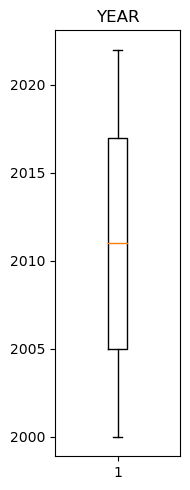

<Figure size 640x480 with 0 Axes>

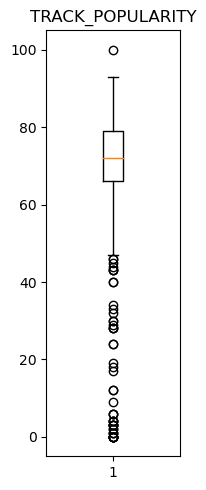

<Figure size 640x480 with 0 Axes>

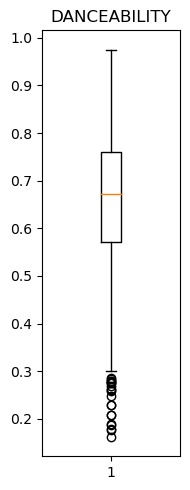

<Figure size 640x480 with 0 Axes>

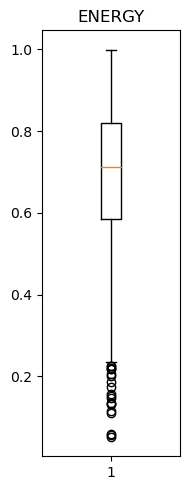

<Figure size 640x480 with 0 Axes>

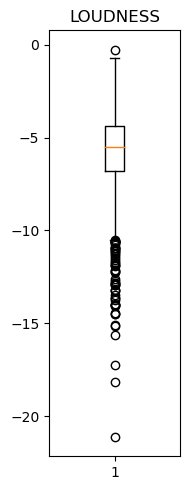

<Figure size 640x480 with 0 Axes>

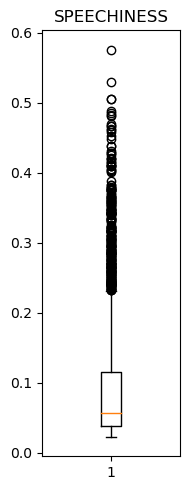

<Figure size 640x480 with 0 Axes>

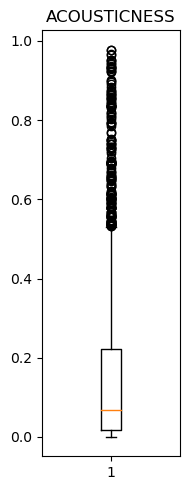

<Figure size 640x480 with 0 Axes>

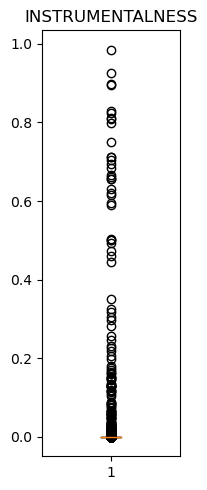

<Figure size 640x480 with 0 Axes>

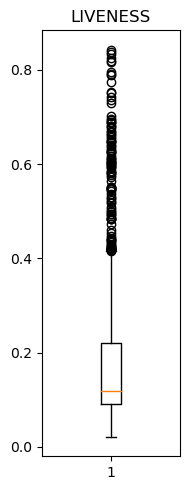

<Figure size 640x480 with 0 Axes>

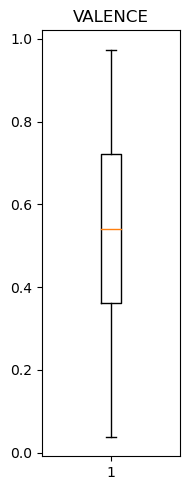

<Figure size 640x480 with 0 Axes>

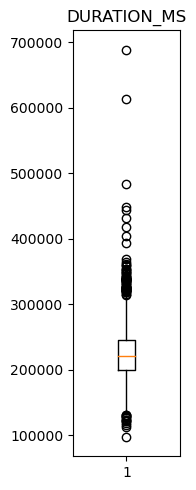

<Figure size 640x480 with 0 Axes>

In [7]:
#Before creating some visualizations, I want to see if any outliers are in our dataset.

#Beginning by identifying variables for plotting
vars_boxplots = ['year','track_popularity','danceability','energy','loudness',\
                 'speechiness','acousticness', 'instrumentalness','liveness','valence','duration_ms']

#Writing a (somewhat) reuseable function for plotting multiple charts.
def outlier_boxplot_check(df, columns):
    for i in range(len(vars_boxplots)):
        current_col = df[columns[i]]
        plt.figure(figsize=(2,5))
        plt.boxplot(current_col)
        plt.title('{}'.format(columns[i]).upper())
        plt.tight_layout()
        plt.show()
        plt.clf()

outlier_boxplot_check(spotify_data, vars_boxplots)

# It looks like some of the characteristic values for tracks have multiple outliers either above or below the IQR.

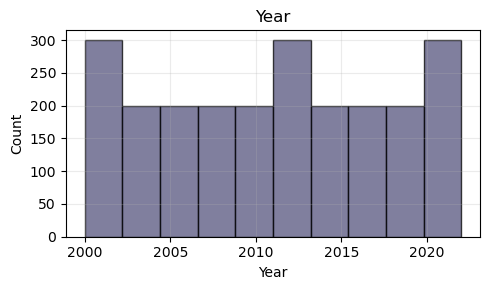

<Figure size 640x480 with 0 Axes>

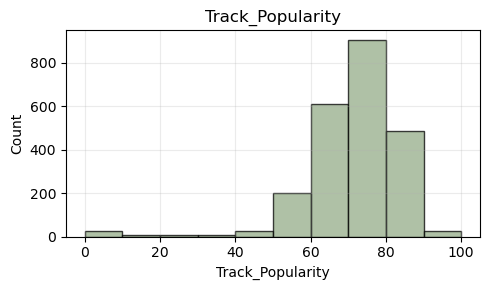

<Figure size 640x480 with 0 Axes>

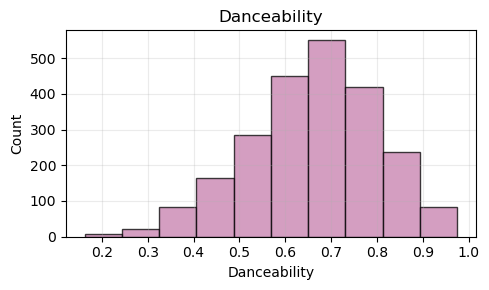

<Figure size 640x480 with 0 Axes>

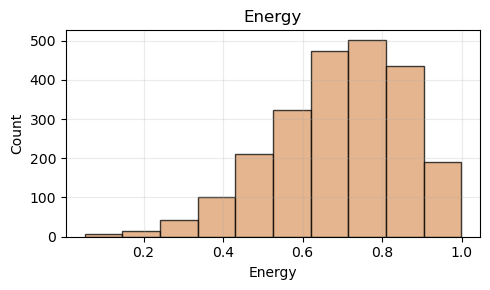

<Figure size 640x480 with 0 Axes>

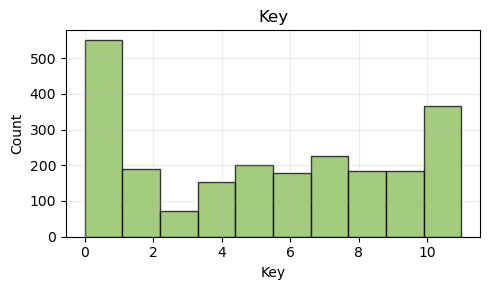

<Figure size 640x480 with 0 Axes>

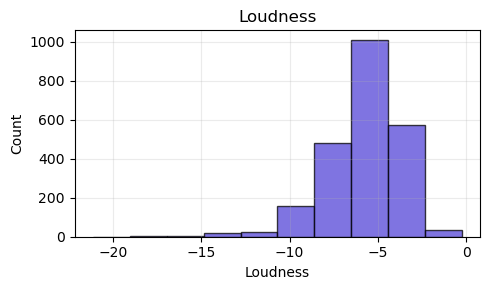

<Figure size 640x480 with 0 Axes>

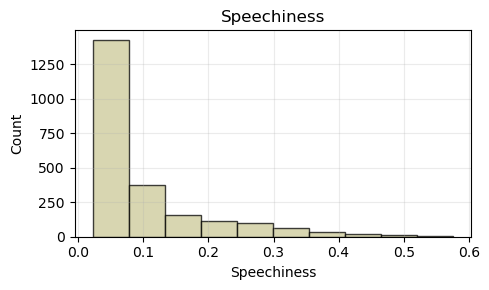

<Figure size 640x480 with 0 Axes>

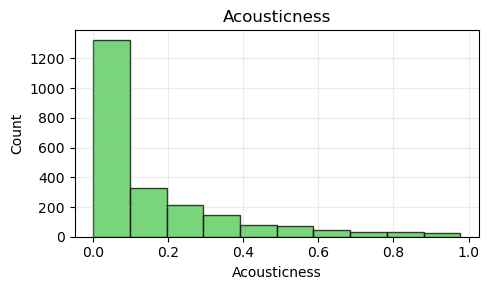

<Figure size 640x480 with 0 Axes>

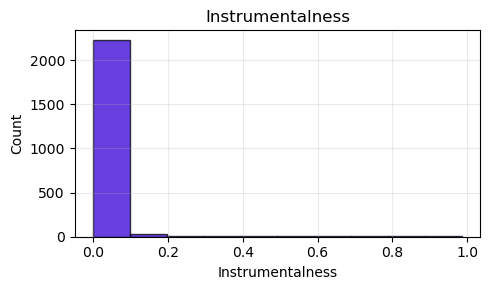

<Figure size 640x480 with 0 Axes>

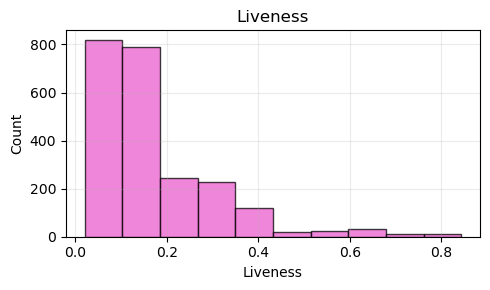

<Figure size 640x480 with 0 Axes>

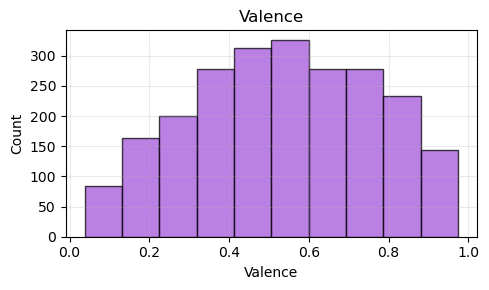

<Figure size 640x480 with 0 Axes>

In [26]:
# Creating histograms for each variable

# Begin with listing out variables to plot in hist model
vars_for_hists = ['year','track_popularity','danceability','energy','key','loudness',\
                 'speechiness','acousticness', 'instrumentalness','liveness','valence','tempo','duration_ms']

#Creating function for creating a historgram for each variable identified
def hist_builder(df, columns):
    # Random colors for hists, because they're pretty
    r = lambda: random.randint(0,255)
    
    # Looping through to create a hist for each desired variable
    for i in range(len(vars_boxplots)):
        random_color = ('#%02X%02X%02X' % (r(),r(),r()))
        current_col = df[columns[i]]
        plt.figure(figsize=(5,3))
        ax = plt.subplot()
        ax.grid(True, alpha=0.25)
        plt.ylabel('Count')
        plt.xlabel(vars_for_hists[i].title())
        plt.hist(current_col, alpha = 0.75, color=random_color, edgecolor='black')
        plt.title('{}'.format(columns[i]).title())
        plt.tight_layout()
        plt.show()
        plt.clf()
        
hist_builder(spotify_data, vars_for_hists)

##### Hist Review
Notes:
 - There is a slight difference in number of tracks per year. This shouldn't be an issue, but it is something to note.
 - The mode for danceability appears to land around 0.6-0.7. It is a unimodal hist.
 - Song energy, danceability, and loudness all are left skewed and unimodal. This points to our sample being comprised of tracks which are typically louder, dancier, and energetic.
 - Key, as expected, appears to be more random. However, as a musician, it is intriguing to see the majority of songs are equal to one. No documentation which I found indicated the order of keys, but my assumption that 1 = C Major, while 12 = B Major.
 - Valence (happy vs. sad emotion) appears to have a normalized distribution.

### EDA

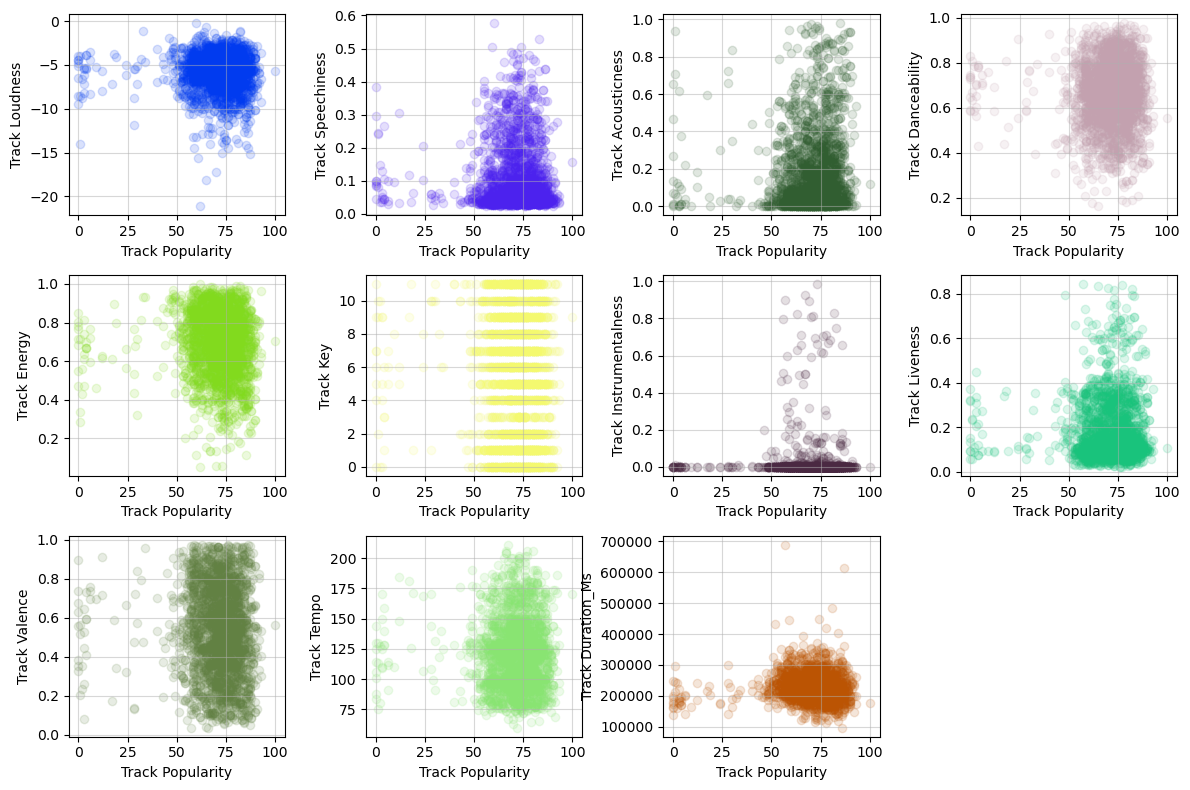

In [28]:
# I would like to start my EDA section off my checking to see if there appear to be any patterns with song popularity compared to our song variables.
spotify_columns

song_variables = ['loudness','speechiness','acousticness','danceability','energy','key','instrumentalness','liveness','valence','tempo','duration_ms']
len(song_variables)

def scatter_plot():
    plt.figure(figsize=(12,8))
    
    for i in range(len(song_variables)):
        ax = plt.subplot(3, 4, i + 1)
        
        # Random colors for scatter plots, because they're pretty
        r = lambda: random.randint(0,255)
        random_color = ('#%02X%02X%02X' % (r(),r(),r()))

        current_variable = spotify_data[song_variables[i]]
        track_pop = spotify_data['track_popularity']
        
        plt.scatter(track_pop, current_variable, alpha=0.15, color = random_color)
        plt.tight_layout()
        plt.ylabel('Track {}'.format(song_variables[i]).title())
        plt.xlabel('Track Popularity')
        
        ax.grid(True, alpha=0.5)

scatter_plot()

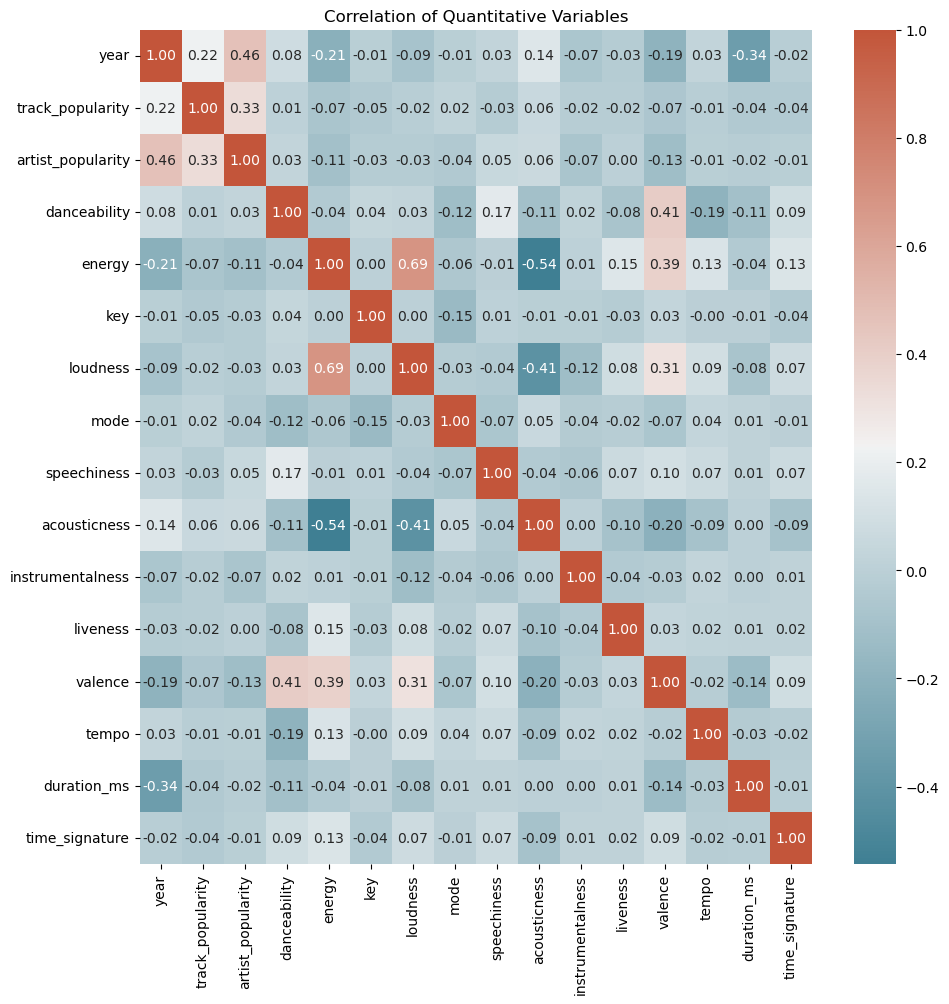

<Figure size 640x480 with 0 Axes>

In [29]:
# Reviewing correlation of variables with a heat map.

# Separate out all numeric data types into correlation matrix
corr_matrix = spotify_data.select_dtypes(include=['int64','float64']).corr()

# Color Palette 
palette = sns.diverging_palette(220, 20, as_cmap=True)

fig, axs = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap=palette, fmt='0.2f')
plt.tight_layout()
plt.title('Correlation of Quantitative Variables')
plt.show()
plt.clf()


## Rerunning above scatter, but with only songs that have made it into the top ten.

# Mean Track Characteristics by Year

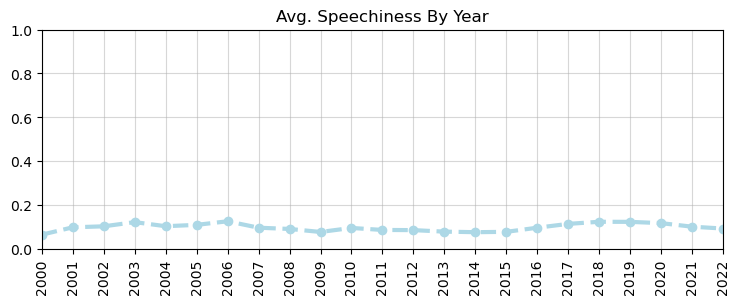

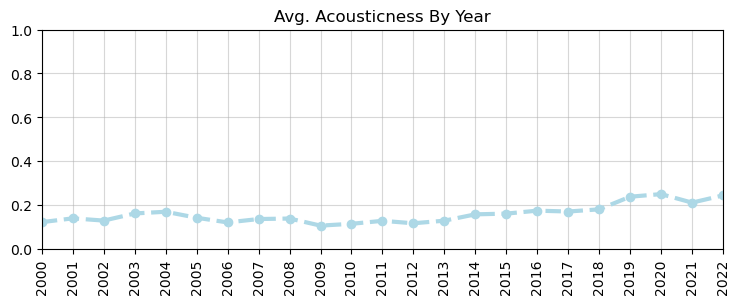

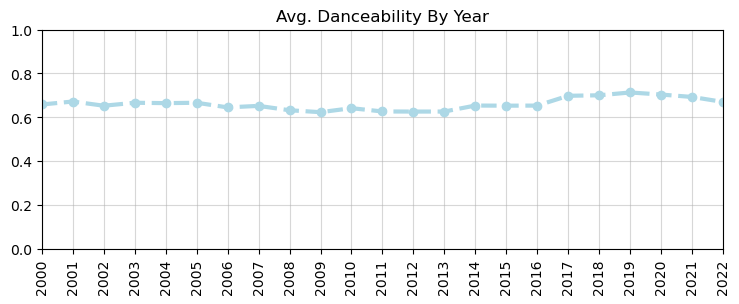

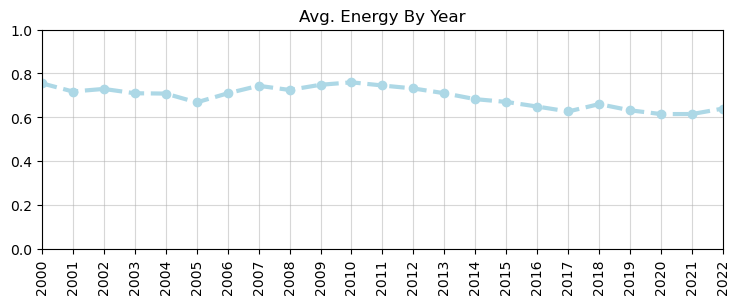

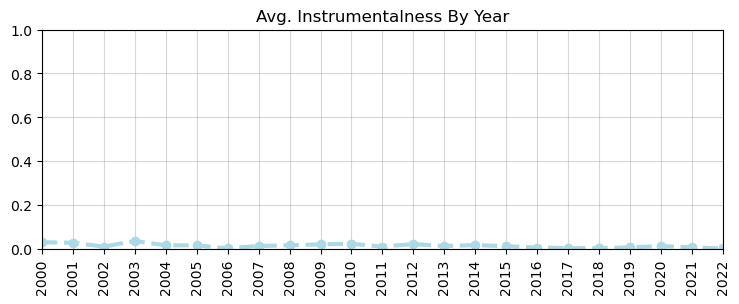

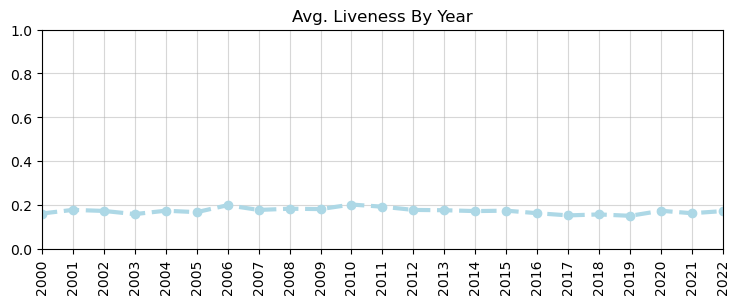

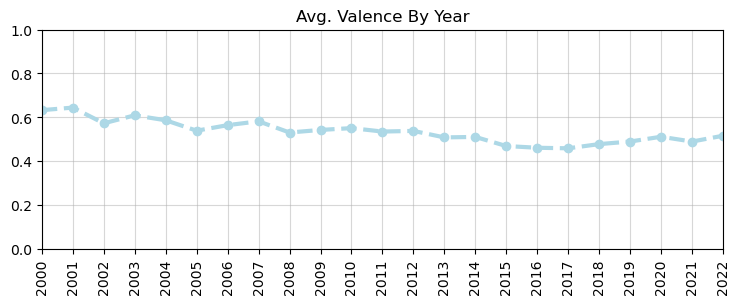

In [138]:
#Separating tracks which only were in the IQR of our sample for general review

numerical_cats = spotify_data.select_dtypes(include=['int64','float64'])

track_characteristics = ['speechiness','acousticness','danceability','energy',\
                   'instrumentalness','liveness','valence']

years = numerical_cats.year.unique()

for i in range(len(track_variables)):
        
    # Identifying Q1 and Q3 
    q1 = np.quantile(numerical_cats[track_characteristics[i]], 0.25) * 1.5
    q3 = np.quantile(numerical_cats[track_characteristics[i]], 0.75) * 1.5
        
    # Constraining dataset for each variable within IQR
    iqr_current_var = numerical_cats
    [((numerical_cats[track_characteristics[i]] >= q1) | (numerical_cats[track_characteristics[i]] <= q3))]
        
    # Identifying mean values by year
    mean_by_year = iqr_current_var.groupby('year')[track_characteristics[i]].mean()

    plt.figure(figsize=(7.5,3))
    plt.plot(mean_by_year, color='lightblue', marker='o', linewidth=3, linestyle='--')
    plt.ylim(0, 1)
    plt.grid(True, alpha=0.5)
    plt.xticks(years, rotation=90)
    plt.xlim(2000, 2022)
    plt.tight_layout()
    plt.title('Avg. {} By Year'.format(track_variables[i]).title())
    plt.show()


### Notes:
 - It may be worth seeing if there is any correlation between valence and year. Chi square, maybe.

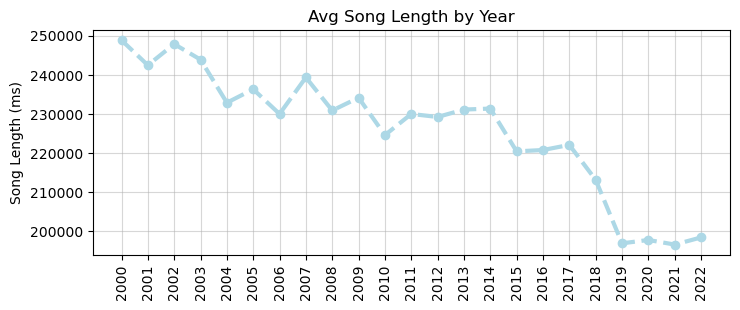

In [107]:
# Analysis of song length, tempo, and loudness
# Analysis of song length
# Identifying song length IQR

q1_length = np.quantile(spotify_data['duration_ms'], 0.25) * 1.5
q3_length = np.quantile(spotify_data['duration_ms'], 0.75) * 1.5
        
# Constraining dataset within IQR
iqr_current_var = numerical_cats
[((spotify_data['duration_ms'] >= q1) | (spotify_data['duration_ms'] <= q3))]
        
# Identifying mean values by year
mean_by_year = iqr_current_var.groupby('year')['duration_ms'].mean()

plt.figure(figsize=(7.5,3))
plt.plot(mean_by_year, color='lightblue', marker='o', linewidth=3, linestyle='--')
plt.grid(True, alpha=0.5)
plt.xticks(years, rotation=90)
plt.ylabel('Song Length (ms)')
plt.tight_layout()
plt.title('Avg Song Length by Year')
plt.show()

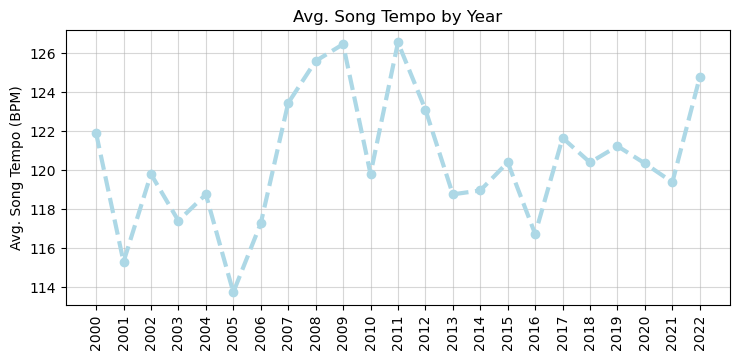

In [140]:
# Analysis of song tempo

# Identifying song tempo IQR

q1_length = np.quantile(spotify_data['tempo'], 0.25) * 1.5
q3_length = np.quantile(spotify_data['tempo'], 0.75) * 1.5
        
# Constraining dataset within IQR
iqr_current_var = numerical_cats
[((spotify_data['tempo'] >= q1) | (spotify_data['tempo'] <= q3))]
        
# Identifying mean value by year
mean_by_year = iqr_current_var.groupby('year')['tempo'].mean()

plt.figure(figsize=(7.5,3.5))
plt.plot(mean_by_year, color='lightblue', marker='o', linewidth=3, linestyle='--')
plt.grid(True, alpha=0.5)
plt.xticks(years, rotation=90)
plt.ylabel('Avg. Song Tempo (BPM)')
plt.tight_layout()
plt.title('Avg. Song Tempo by Year')
plt.show()

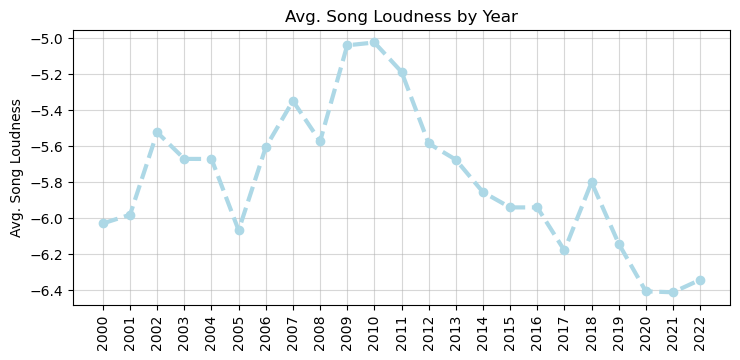

In [139]:
# Analysis of song loudness

# Identifying song loudness IQR

q1_length = np.quantile(spotify_data['loudness'], 0.25) * 1.5
q3_length = np.quantile(spotify_data['loudness'], 0.75) * 1.5
        
# Constraining dataset within IQR
iqr_current_var = numerical_cats
[((spotify_data['loudness'] >= q1) | (spotify_data['loudness'] <= q3))]
        
# Identifying mean value by year
mean_by_year = iqr_current_var.groupby('year')['loudness'].mean()

plt.figure(figsize=(7.5,3.5))
plt.plot(mean_by_year, color='lightblue', marker='o', linewidth=3, linestyle='--')
plt.grid(True, alpha=0.5)
plt.xticks(years, rotation=90)
plt.ylabel('Avg. Song Loudness')
plt.tight_layout()
plt.title('Avg. Song Loudness by Year')
plt.show()